1) Import libraries

In [196]:
import pandas as pd
import matplotlib.pyplot as plt

2) Import the layoff data

In [197]:
"""
# Read the CSV file for New York layoffs
df_ny = pd.read_csv('../data/tech_layoffs_ny.csv')
# Display the first few rows
print("New York Layoffs:") 
df_ny.head()
"""

'\n# Read the CSV file for New York layoffs\ndf_ny = pd.read_csv(\'../data/tech_layoffs_ny.csv\')\n# Display the first few rows\nprint("New York Layoffs:") \ndf_ny.head()\n'

In [198]:
"""
# Read the CSV file for Texas layoffs
df_te = pd.read_csv('../data/tech_layoffs_te.csv')
# Display the first few rows
print("Texas Layoffs:")
df_te.head()
"""

'\n# Read the CSV file for Texas layoffs\ndf_te = pd.read_csv(\'../data/tech_layoffs_te.csv\')\n# Display the first few rows\nprint("Texas Layoffs:")\ndf_te.head()\n'

3) Other way to get the layoffs for both states, in all the big tech companies

In [199]:
df_amazon = pd.read_csv('../data/data_amazon.csv')
df_apple = pd.read_csv('../data/data_apple.csv')
df_facebook = pd.read_csv('../data/data_facebook.csv')
df_google = pd.read_csv('../data/data_google.csv')
df_microsoft = pd.read_csv('../data/data_microsoft.csv')
df_tesla = pd.read_csv('../data/data_tesla.csv')
df_twitter = pd.read_csv('../data/data_twitter.csv')
df_amazon.head()

,State,Company,City,Number of Workers,WARN Received Date,Effective Date,Closure/Layoff,Temporary/Permanent,Union,Region,County,Industry,Notes
0,California,Amazon (SJC11 Facility),Sunnyvale,33,05/15/2025,07/07/2025,Layoff Permanent,NaN,NaN,NaN,Santa Clara County,44-45 Retail Trade,1100 Enterprise Way Sunnyvale CA 94089
1,California,Amazon (SJC14 Facility),Sunnyvale,6,05/15/2025,07/07/2025,Layoff Permanent,NaN,NaN,NaN,Santa Clara County,44-45 Retail Trade,905 11th Avenue Sunnyvale CA 94089
2,California,Amazon (SJC31 Facility),Sunnyvale,5,05/15/2025,07/07/2025,Layoff Permanent,NaN,NaN,NaN,Santa Clara County,44-45 Retail Trade,1100 Discovery Way Sunnyvale CA 94089
3,California,Amazon (SJC32 Facility),Sunnyvale,8,05/15/2025,07/07/2025,Layoff Permanent,NaN,NaN,NaN,Santa Clara County,44-45 Retail Trade,1140 Enterprise Way Sunnyvale CA 94089
4,Virginia,Amazon MAK7,Manassas,88,03/12/2025,05/13/2025,Closure,NaN,NaN,Northern,NaN,NaN,NaN


In [200]:
# Combine all the dataframes into a single dataframe
df_combined = pd.concat([df_amazon, df_apple, df_facebook, df_google, df_microsoft, df_tesla, df_twitter], ignore_index=True)
df_combined.head()

,State,Company,City,Number of Workers,WARN Received Date,Effective Date,Closure/Layoff,Temporary/Permanent,Union,Region,County,Industry,Notes,Received Date,Effective\n Date,Layoff/Closure
0,California,Amazon (SJC11 Facility),Sunnyvale,33,05/15/2025,07/07/2025,Layoff Permanent,NaN,NaN,NaN,Santa Clara County,44-45 Retail Trade,1100 Enterprise Way Sunnyvale CA 94089,NaN,NaN,NaN
1,California,Amazon (SJC14 Facility),Sunnyvale,6,05/15/2025,07/07/2025,Layoff Permanent,NaN,NaN,NaN,Santa Clara County,44-45 Retail Trade,905 11th Avenue Sunnyvale CA 94089,NaN,NaN,NaN
2,California,Amazon (SJC31 Facility),Sunnyvale,5,05/15/2025,07/07/2025,Layoff Permanent,NaN,NaN,NaN,Santa Clara County,44-45 Retail Trade,1100 Discovery Way Sunnyvale CA 94089,NaN,NaN,NaN
3,California,Amazon (SJC32 Facility),Sunnyvale,8,05/15/2025,07/07/2025,Layoff Permanent,NaN,NaN,NaN,Santa Clara County,44-45 Retail Trade,1140 Enterprise Way Sunnyvale CA 94089,NaN,NaN,NaN
4,Virginia,Amazon MAK7,Manassas,88,03/12/2025,05/13/2025,Closure,NaN,NaN,Northern,NaN,NaN,NaN,NaN,NaN,NaN


4) A first graph to explore whether there is a trend in layoffs over time

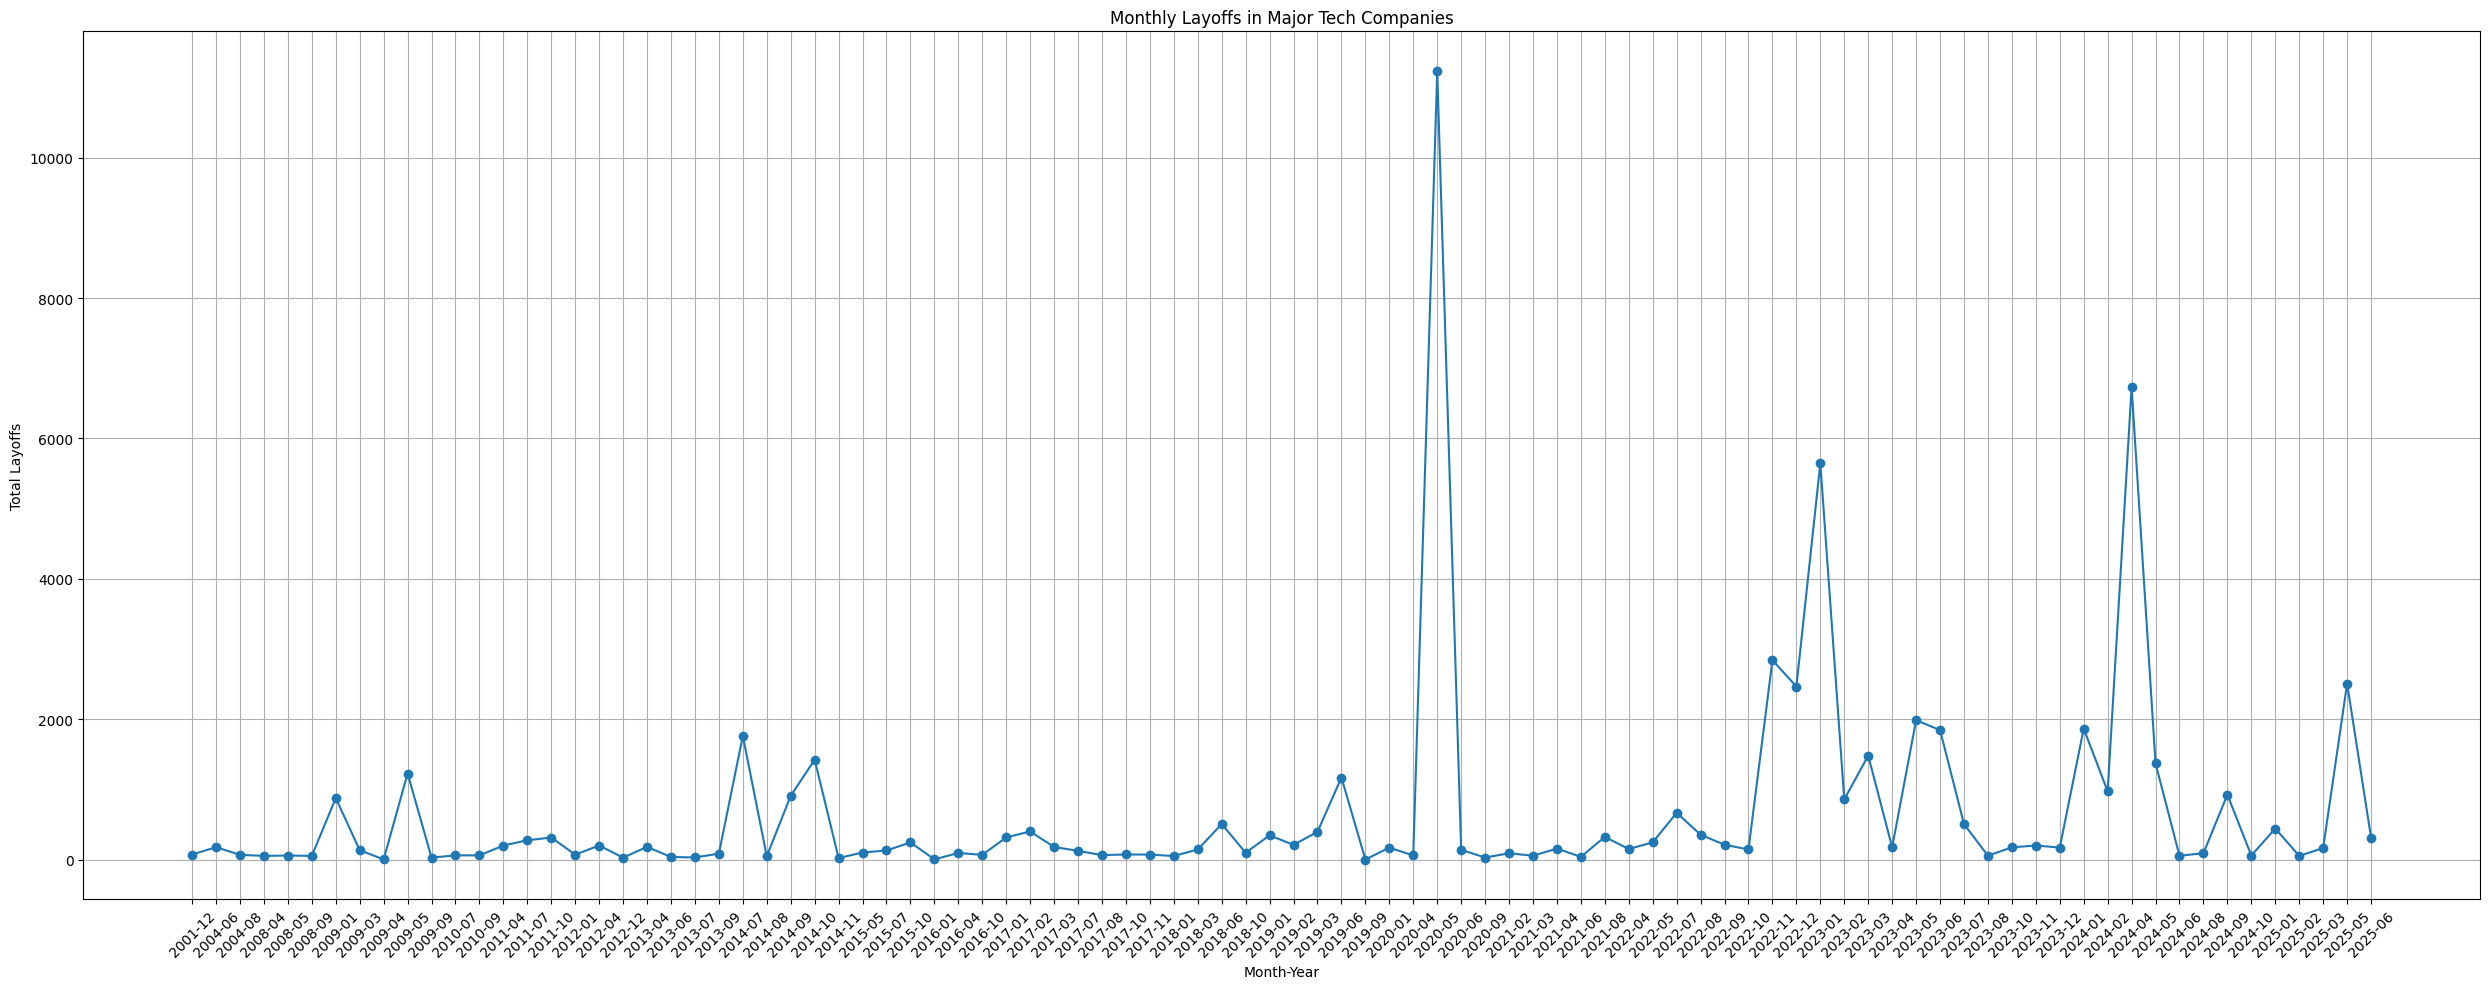

In [201]:
# Convert the 'WARN Received Date' column to datetime format
df_combined['WARN Received Date']= pd.to_datetime(df_combined['WARN Received Date'])
# Create a new column to just keep the month and year
df_combined['Month-Year'] = df_combined['WARN Received Date'].dt.to_period('M')
# Remove the coma if any from the 'Number of Workers' column
df_combined['Number of Workers'] = (df_combined['Number of Workers'].astype(str).str.replace(',', '', regex=False).str.replace('\u202f', '', regex=False).str.strip())
# Convert the Number of Workers column to numeric
df_combined['Number of Workers'] = pd.to_numeric(df_combined['Number of Workers'], errors='coerce')
# Group by 'Month-Year' and sum the layoffs
df_monthly_layoffs = df_combined.groupby('Month-Year')['Number of Workers'].sum().reset_index()

# Plot the monthly layoffs
plt.figure(figsize=(25, 10))
plt.plot(df_monthly_layoffs['Month-Year'].astype(str), df_monthly_layoffs['Number of Workers'], marker='o')
plt.title('Monthly Layoffs in Major Tech Companies')
plt.xlabel('Month-Year')    
plt.ylabel('Total Layoffs')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

We observe a certain seasonality in layoffs, which suggests that this time series could be used to train a forecasting model. 

5) Take the data for every state of interest

In [202]:
# Keep only the layoffs from Texas
df_texas = df_combined[(df_combined['State'] == 'Texas')].copy()
# Display the first few rows of the dataframe
print("Combined Layoffs Data (Texas):")
df_texas.head()

Combined Layoffs Data (Texas):


,State,Company,City,Number of Workers,WARN Received Date,Effective Date,Closure/Layoff,Temporary/Permanent,Union,Region,County,Industry,Notes,Received Date,Effective\n Date,Layoff/Closure,Month-Year
29,Texas,Whole Food Market (Midtown Houston),Houston,110.0,2023-11-08,12/05/2023,NaN,NaN,NaN,Gulf Coast WDA,Harris,NaN,NaN,NaN,NaN,NaN,2023-11
97,Texas,Whole Foods Market-Bolm Rd.,Austin,40.0,2017-03-02,04/30/2017,NaN,NaN,NaN,Capital Area WDA,Travis,NaN,NaN,NaN,NaN,NaN,2017-03
103,Texas,Whole Foods Market-Houston,Houston,100.0,2015-05-01,07/03/2015,NaN,NaN,NaN,Gulf Coast WDA,Harris,NaN,NaN,NaN,NaN,NaN,2015-05
106,Texas,Whole Foods Market - Dallas Bakehouse,Dallas,70.0,2012-01-02,03/11/2012,NaN,NaN,NaN,Dallas County WDA,Dallas,NaN,NaN,NaN,NaN,NaN,2012-01
108,Texas,Whole Foods Market - Southwest Distribution Ce...,Austin,60.0,2010-07-27,09/26/2010,NaN,NaN,NaN,Capital Area WDB,Travis,NaN,NaN,NaN,NaN,NaN,2010-07


In [203]:
# Keep only the layoffs from new York
df_ny = df_combined[(df_combined['State'] == 'New York')].copy()
# Display the first few rows of the dataframe
print("Combined Layoffs Data (New York):")
df_ny.head()

Combined Layoffs Data (New York):


,State,Company,City,Number of Workers,WARN Received Date,Effective Date,Closure/Layoff,Temporary/Permanent,Union,Region,County,Industry,Notes,Received Date,Effective\n Date,Layoff/Closure,Month-Year
83,New York,Instacart (at Whole Foods Market) Bedford Avenue,Brooklyn,43.0,2019-03-13,05/11/2019,Plant Closing,NaN,NaN,New York City,Kings,Food Services/Delivery,Economic,NaN,NaN,NaN,2019-03
84,New York,Instacart (at Whole Foods Market) Greenwich St...,New York,26.0,2019-03-13,05/11/2019,Plant Closing,NaN,NaN,New York City,"New York,",Food Services/Delivery,Economic,NaN,NaN,NaN,2019-03
85,New York,Instacart (at Whole Foods Market) Columbus Circle,New York,32.0,2019-03-13,05/11/2019,Plant Closing,NaN,NaN,New York City,"New York,",Food Services/Delivery,Economic,NaN,NaN,NaN,2019-03
86,New York,Instacart (at Whole Foods Market) (95 East Hou...,New York,21.0,2019-03-13,05/11/2019,Plant Closing,NaN,NaN,New York City,"New York,",Food Services/Delivery,Economic,NaN,NaN,NaN,2019-03
87,New York,Instacart (at Whole Foods Market) (4 Union Squ...,New York,21.0,2019-03-13,05/11/2019,Plant Closing,NaN,NaN,New York City,"New York,",Food Services/Delivery,Economic,NaN,NaN,NaN,2019-03


In [204]:
# Keep only the layoffs from California
df_california = df_combined[(df_combined['State'] == 'California')].copy()
# Display the first few rows of the dataframe
print("Combined Layoffs Data (California):")
df_california.head()

Combined Layoffs Data (California):


,State,Company,City,Number of Workers,WARN Received Date,Effective Date,Closure/Layoff,Temporary/Permanent,Union,Region,County,Industry,Notes,Received Date,Effective\n Date,Layoff/Closure,Month-Year
0,California,Amazon (SJC11 Facility),Sunnyvale,33.0,2025-05-15,07/07/2025,Layoff Permanent,NaN,NaN,NaN,Santa Clara County,44-45 Retail Trade,1100 Enterprise Way Sunnyvale CA 94089,NaN,NaN,NaN,2025-05
1,California,Amazon (SJC14 Facility),Sunnyvale,6.0,2025-05-15,07/07/2025,Layoff Permanent,NaN,NaN,NaN,Santa Clara County,44-45 Retail Trade,905 11th Avenue Sunnyvale CA 94089,NaN,NaN,NaN,2025-05
2,California,Amazon (SJC31 Facility),Sunnyvale,5.0,2025-05-15,07/07/2025,Layoff Permanent,NaN,NaN,NaN,Santa Clara County,44-45 Retail Trade,1100 Discovery Way Sunnyvale CA 94089,NaN,NaN,NaN,2025-05
3,California,Amazon (SJC32 Facility),Sunnyvale,8.0,2025-05-15,07/07/2025,Layoff Permanent,NaN,NaN,NaN,Santa Clara County,44-45 Retail Trade,1140 Enterprise Way Sunnyvale CA 94089,NaN,NaN,NaN,2025-05
5,California,Amazon,Thousand Oaks,76.0,2025-03-14,05/13/2025,Closure Permanent,NaN,NaN,NaN,Ventura County,44-45 Retail Trade,140 Promenade Way Thousand Oaks CA 91362,NaN,NaN,NaN,2025-03


In [205]:
# Keep only the layoffs from Washington
df_washington = df_combined[(df_combined['State'] == 'Washington')].copy()
# Display the first few rows of the dataframe
print("Combined Layoffs Data (Washington):")
df_washington.head()

Combined Layoffs Data (Washington):


,State,Company,City,Number of Workers,WARN Received Date,Effective Date,Closure/Layoff,Temporary/Permanent,Union,Region,County,Industry,Notes,Received Date,Effective\n Date,Layoff/Closure,Month-Year
14,Washington,Amazon,Tukwila,172.0,2024-05-31,08/01/2024,Closure,Permanent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05
57,Washington,Amazon,"Seattle, Bellevue",2300.0,2023-01-18,03/19/2023,Layoff,Permanent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01
67,Washington,Amazon Health Services,Seattle,159.0,2022-09-07,12/01/2022,Closure,Permanent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09
82,Washington,Whole Foods Market,Vancouver,121.0,2019-06-21,08/18/2019,Closure,Permanent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06
214,Washington,"Meta Platforms, Inc",Bellevue,307.0,2022-11-11,01/13/2023,Layoff,Permanent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-11


4) For each state, I want to know the number of workers who received the WARN per month

In [206]:
# Group by 'Month-Year' and count the number of layoffs
df_texas_monthly = df_texas.groupby('Month-Year')['Number of Workers'].sum().reset_index()
# Display the monthly layoffs data for Texas
print("Monthly Layoffs Data for Texas:")
print(df_texas_monthly)

Monthly Layoffs Data for Texas:
  Month-Year  Number of Workers
0    2008-04               52.0
1    2010-07               60.0
2    2012-01               70.0
3    2015-05              100.0
4    2017-03               40.0
5    2022-11              222.0
6    2023-11              110.0
7    2024-04             2688.0
8    2025-05               50.0


In [207]:
df_ny_monthly = df_ny.groupby('Month-Year')['Number of Workers'].sum().reset_index()
print("Monthly Layoffs Data for New York:")
print(df_ny_monthly)

Monthly Layoffs Data for New York:
  Month-Year  Number of Workers
0    2009-05               26.0
1    2011-07              275.0
2    2012-12               27.0
3    2014-07               32.0
4    2014-08               47.0
5    2014-09                1.0
6    2016-04               94.0
7    2019-03              235.0


In [208]:
df_california_monthly = df_california.groupby('Month-Year')['Number of Workers'].sum().reset_index()     
print("Monthly Layoffs Data for California:")
print(df_california_monthly)

Monthly Layoffs Data for California:
   Month-Year  Number of Workers
0     2009-01                4.0
1     2010-09               59.0
2     2011-04              200.0
3     2011-10              314.0
4     2012-04              200.0
5     2013-04              181.0
6     2013-06               36.0
7     2013-07               30.0
8     2013-09               84.0
9     2014-07              378.0
10    2014-09              160.0
11    2014-10              154.0
12    2014-11               21.0
13    2015-07              129.0
14    2015-10              244.0
15    2016-01                2.0
16    2016-10               67.0
17    2017-01               94.0
18    2017-02              196.0
19    2017-08               63.0
20    2017-10               72.0
21    2018-01               50.0
22    2018-06              506.0
23    2019-02              209.0
24    2019-03              141.0
25    2019-06             1048.0
26    2020-04               58.0
27    2020-05            11239.0
28    

In [209]:
df_washington_monthly = df_washington.groupby('Month-Year')['Number of Workers'].sum().reset_index()
print("Monthly Layoffs Data for Washington:")
print(df_washington_monthly)

Monthly Layoffs Data for Washington:
   Month-Year  Number of Workers
0     2004-08               67.0
1     2009-01              872.0
2     2009-04                2.0
3     2009-05             1200.0
4     2009-09               27.0
5     2014-07             1351.0
6     2014-09              747.0
7     2014-10              635.0
8     2019-06              121.0
9     2022-09              159.0
10    2022-11              934.0
11    2023-01             3178.0
12    2023-02              617.0
13    2023-03             1248.0
14    2023-05              158.0
15    2023-06               22.0
16    2023-07              276.0
17    2024-05              172.0
18    2025-05             1985.0
19    2025-06              305.0


5) Other visualizations

AttributeError: Axes.set() got an unexpected keyword argument 'rotation'

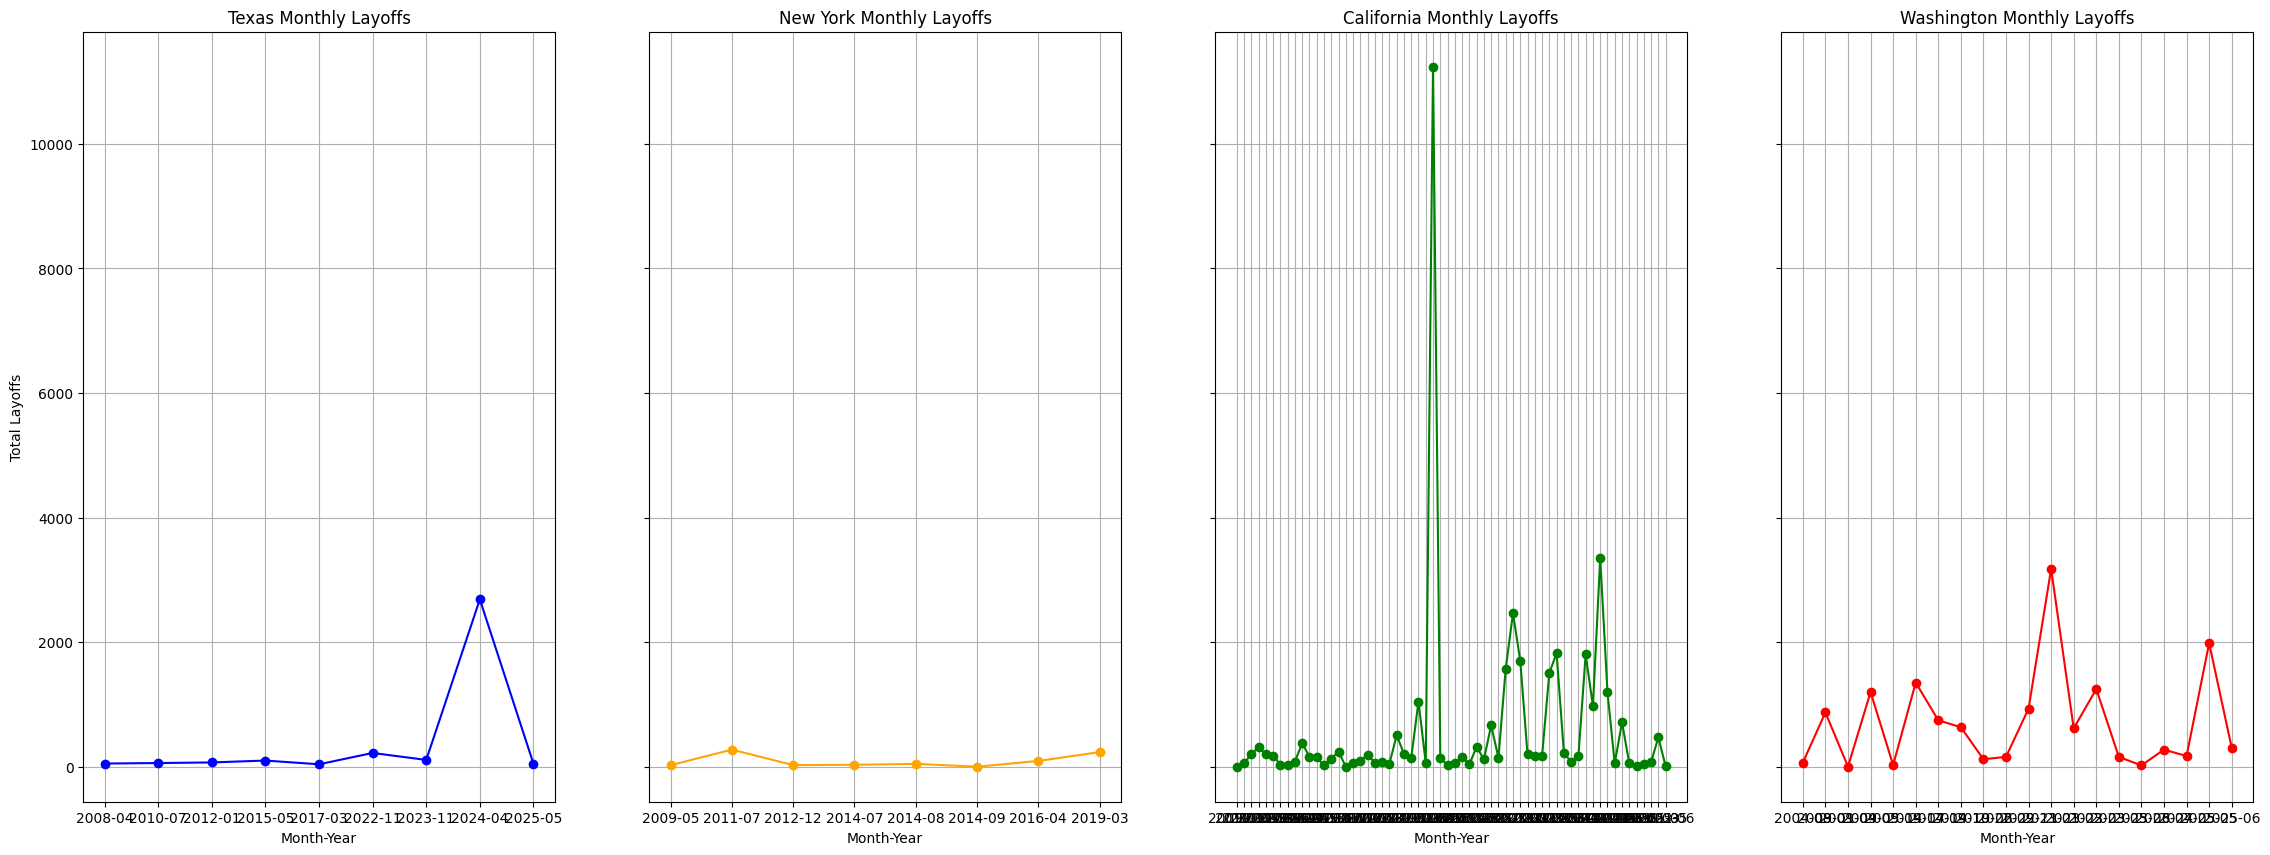

In [215]:
states_to_plot = {'Texas', 'New York', 'California', 'Washington'}
# Create a new figure with four subplots
fig, axs = plt.subplots(1, 4, figsize=(28, 10), sharey=True)
# Plot each state's monthly layoffs
axs[0].plot(df_texas_monthly['Month-Year'].astype(str), df_texas_monthly['Number of Workers'], marker='o', color='blue')
axs[0].set_title('Texas Monthly Layoffs')   
axs[0].set_xlabel('Month-Year')
axs[0].set_ylabel('Total Layoffs')
axs[0].grid()
axs[1].plot(df_ny_monthly['Month-Year'].astype(str), df_ny_monthly['Number of Workers'], marker='o', color='orange')
axs[1].set_title('New York Monthly Layoffs')
axs[1].set_xlabel('Month-Year')
axs[1].grid()
axs[2].plot(df_california_monthly['Month-Year'].astype(str), df_california_monthly['Number of Workers'], marker='o', color='green')
axs[2].set_title('California Monthly Layoffs')
axs[2].set_xlabel('Month-Year')
axs[2].grid()
axs[3].plot(df_washington_monthly['Month-Year'].astype(str), df_washington_monthly['Number of Workers'], marker='o', color='red')
axs[3].set_title('Washington Monthly Layoffs')
axs[3].set_xlabel('Month-Year')
axs[3].grid()
# Set the x-ticks for all subplots
plt.setp(axs, xticks=df_texas_monthly['Month-Year'].astype(str), xticklabels=df_texas_monthly['Month-Year'].astype(str), rotation=45)
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
